# Table of content

# 1. Select essential attributes & data cleaning
# 2. Data visualization and analysis
# 3. Conclusion

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
ab = pd.read_csv("listings.csv")
ab.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,69074,https://www.airbnb.com/rooms/69074,20210220182008,2021-02-21,Beautiful oasis of plants & art @ best location,An ideal Hong location any visitor--hip withou...,"In the upper part of trendy, hip Sheung Wan, w...",https://a0.muscache.com/pictures/84364564/1e0c...,160139,https://www.airbnb.com/users/show/160139,...,10.0,10.0,9.0,NaN,f,1,1,0,0,1.10
1,75083,https://www.airbnb.com/rooms/75083,20210220182008,2021-02-21,SoHo off Hollywood Road 3B,"Located steps from Hollywood road, with new ea...",NaN,https://a0.muscache.com/pictures/2873745/90c15...,304876,https://www.airbnb.com/users/show/304876,...,9.0,10.0,9.0,NaN,f,14,10,4,0,1.89
2,103760,https://www.airbnb.com/rooms/103760,20210220182008,2021-02-21,Central Centre 5 min walk to/from Central MTR,"Located right in the heart of Central, this 2 ...",NaN,https://a0.muscache.com/pictures/815221/056993...,304876,https://www.airbnb.com/users/show/304876,...,10.0,10.0,9.0,NaN,f,14,10,4,0,2.31
3,104626,https://www.airbnb.com/rooms/104626,20210220182008,2021-02-21,Entire Flat - Next to Man Mo Temple,<b>The space</b><br />Situated in one of Hong ...,NaN,https://a0.muscache.com/pictures/1947265/ef01a...,544166,https://www.airbnb.com/users/show/544166,...,10.0,10.0,9.0,NaN,f,1,1,0,0,0.12
4,132773,https://www.airbnb.com/rooms/132773,20210220182008,2021-02-21,Fabulous 2 Bdrm Aprt Open kitchen,"Nicely decorated, spacious 2 bedroom apartment...",The Sheung Wan neighbourhood is ever changing ...,https://a0.muscache.com/pictures/36936441/e4c1...,304876,https://www.airbnb.com/users/show/304876,...,10.0,10.0,10.0,NaN,f,14,10,4,0,1.77


In [5]:
# Getting a fast overview of the data set
ab.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

# Selected these 10 columns as analysis features

In [7]:
columns = [
    'price',
    'neighbourhood_cleansed',
    'room_type',
    'accommodates',
    'beds',
    'bedrooms',
    'number_of_reviews',
    'review_scores_rating',
    'latitude',
    'longitude']
ab1 = pd.read_csv("listings.csv", usecols=columns)
ab1.head()

,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,price,number_of_reviews,review_scores_rating
0,Central & Western,22.28352,114.15018,Entire home/apt,3,1.0,2.0,"$1,135.00",134,97.0
1,Central & Western,22.28398,114.14839,Entire home/apt,3,NaN,2.0,$403.00,229,89.0
2,Central & Western,22.28407,114.15570,Entire home/apt,6,2.0,3.0,$613.00,272,89.0
3,Central & Western,22.28222,114.14834,Entire home/apt,2,1.0,1.0,"$2,631.00",14,93.0
4,Central & Western,22.28868,114.14494,Entire home/apt,6,2.0,3.0,$845.00,207,93.0


In [8]:
ab1.shape

(7087, 10)

In [9]:
ab1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7087 entries, 0 to 7086
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  7087 non-null   object 
 1   latitude                7087 non-null   float64
 2   longitude               7087 non-null   float64
 3   room_type               7087 non-null   object 
 4   accommodates            7087 non-null   int64  
 5   bedrooms                5857 non-null   float64
 6   beds                    6911 non-null   float64
 7   price                   7087 non-null   object 
 8   number_of_reviews       7087 non-null   int64  
 9   review_scores_rating    3778 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 553.8+ KB


# Let's start checking those missing vales

In [10]:
ab1.neighbourhood_cleansed.unique()
# Including ALL Hong Kong 18 districts. Perfect~

array(['Central & Western', 'Yau Tsim Mong', 'Wan Chai', 'Yuen Long',
       'Kowloon City', 'Islands', 'North', 'Southern', 'Sham Shui Po',
       'Tuen Mun', 'Eastern', 'Sai Kung', 'Wong Tai Sin', 'Sha Tin',
       'Kwai Tsing', 'Tsuen Wan', 'Tai Po', 'Kwun Tong'], dtype=object)

In [11]:
ab1.bedrooms.unique()

array([ 1., nan,  2.,  3.,  4.,  7.,  9.,  5.,  6., 11., 10.,  8.])

In [12]:
#Just fill in NA to 0
ab1['bedrooms'].fillna(0, inplace=True)
ab1['bedrooms'].head()

0    1.0
1    0.0
2    2.0
3    1.0
4    2.0
Name: bedrooms, dtype: float64

In [13]:
ab1.beds.unique()

array([ 2.,  3.,  1.,  6.,  8.,  4.,  5.,  7.,  0., nan,  9., 10., 16.,
       13., 11., 14., 17., 15., 20.])

In [14]:
ab1['beds'].fillna(0, inplace=True)
ab1['beds'].head()

0    2.0
1    2.0
2    3.0
3    1.0
4    3.0
Name: beds, dtype: float64

In [15]:
ab1.info()
#Even though column 'review_scores_rating' only indicate 3778 values,
#it's fine for us to calculate the mean of this value because some accommodations are never rated

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7087 entries, 0 to 7086
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  7087 non-null   object 
 1   latitude                7087 non-null   float64
 2   longitude               7087 non-null   float64
 3   room_type               7087 non-null   object 
 4   accommodates            7087 non-null   int64  
 5   bedrooms                7087 non-null   float64
 6   beds                    7087 non-null   float64
 7   price                   7087 non-null   object 
 8   number_of_reviews       7087 non-null   int64  
 9   review_scores_rating    3778 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 553.8+ KB


In [16]:
ab1['price'] = ab1['price'].str.replace(r"[$,]", "", regex=True).astype('float32')
ab1['price'].head()

0    1135.0
1     403.0
2     613.0
3    2631.0
4     845.0
Name: price, dtype: float32

In [17]:
ab1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7087 entries, 0 to 7086
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  7087 non-null   object 
 1   latitude                7087 non-null   float64
 2   longitude               7087 non-null   float64
 3   room_type               7087 non-null   object 
 4   accommodates            7087 non-null   int64  
 5   bedrooms                7087 non-null   float64
 6   beds                    7087 non-null   float64
 7   price                   7087 non-null   float32
 8   number_of_reviews       7087 non-null   int64  
 9   review_scores_rating    3778 non-null   float64
dtypes: float32(1), float64(5), int64(2), object(2)
memory usage: 526.1+ KB


# Using latitude & longitude for mapping and deeply investigating all attributes

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

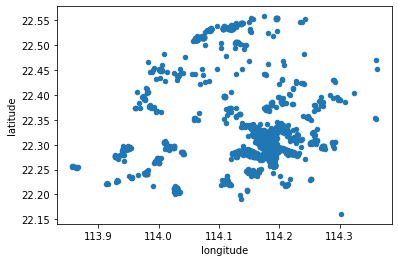

In [18]:
ab1.plot(kind="scatter",
         x="longitude",
         y="latitude")
#it seems most of the Airbnb highly concentrated in Kowloon & Hong Kong Island

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

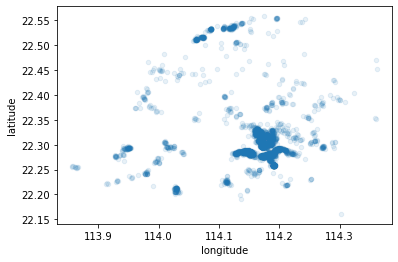

In [19]:
ab1.plot(kind="scatter",
         x="longitude",
         y="latitude", alpha=0.1)
#Adjusting parameter 'alpha' could show the destiny 

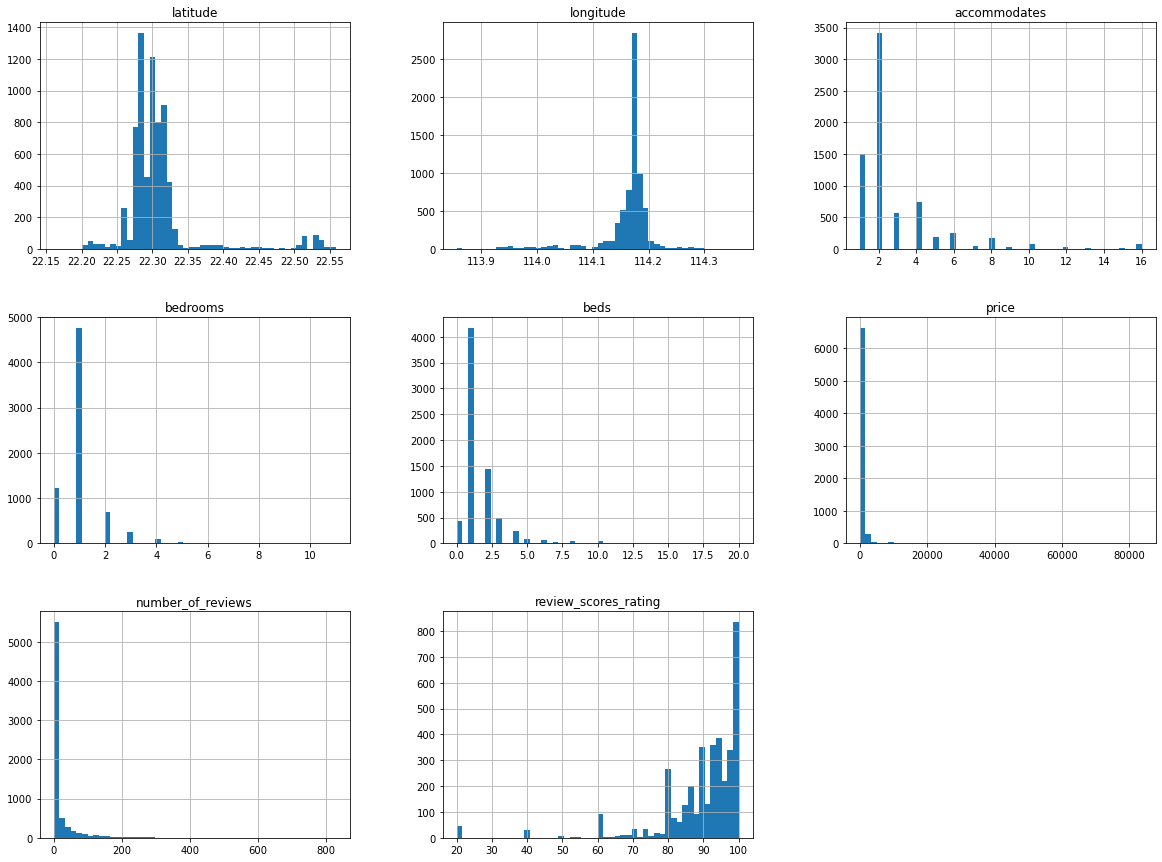

In [20]:
ab1.hist(bins=50, figsize=(20,15))
plt.show()
#Plotting a histogram for each numerical attributes

In [21]:
ab1 = ab1.rename(columns={"neighbourhood_cleansed": "district"})
#According to the division of geography and administration of Hong Kong, 
#It could be divided into region & districts so that column 'neighbourhood_cleansed' is renamed as 'district'

In [22]:
ab1['region'] = ab1['district'].copy()
#Also adding new column 'region' for better understanding

In [23]:
ab1['region'] = ab1['region'].replace(
    dict.fromkeys(['Central & Western', 'Eastern', 'Southern', 'Wan Chai'], 'Hong Kong Island'), 
    regex=True
)

In [24]:
ab1['region'] = ab1['region'].replace(
    dict.fromkeys(['Yau Tsim Mong', 'Sham Shui Po', 'Kowloon City', 'Kwun Tong', 'Wong Tai Sin'], 'Kowloon'), 
    regex=True
)

In [25]:
ab1['region'] = ab1['region'].replace(
    dict.fromkeys(['Kwai Tsing', 'Tsuen Wan', 'Tuen Mun', 'Yuen Long', 'North', 'Tai Po', 'Sha Tin', 'Sai Kung', 'Islands'], 'New Territories'), 
    regex=True
)

In [26]:
ab1['region'].unique()

array(['Hong Kong Island', 'Kowloon', 'New Territories'], dtype=object)

In [27]:
ab1.head()

,district,latitude,longitude,room_type,accommodates,bedrooms,beds,price,number_of_reviews,review_scores_rating,region
0,Central & Western,22.28352,114.15018,Entire home/apt,3,1.0,2.0,1135.0,134,97.0,Hong Kong Island
1,Central & Western,22.28398,114.14839,Entire home/apt,3,0.0,2.0,403.0,229,89.0,Hong Kong Island
2,Central & Western,22.28407,114.15570,Entire home/apt,6,2.0,3.0,613.0,272,89.0,Hong Kong Island
3,Central & Western,22.28222,114.14834,Entire home/apt,2,1.0,1.0,2631.0,14,93.0,Hong Kong Island
4,Central & Western,22.28868,114.14494,Entire home/apt,6,2.0,3.0,845.0,207,93.0,Hong Kong Island


# All data cleansed. Just start analyzing and visualizing it!
# Having a quick look at the frequency of different attributes

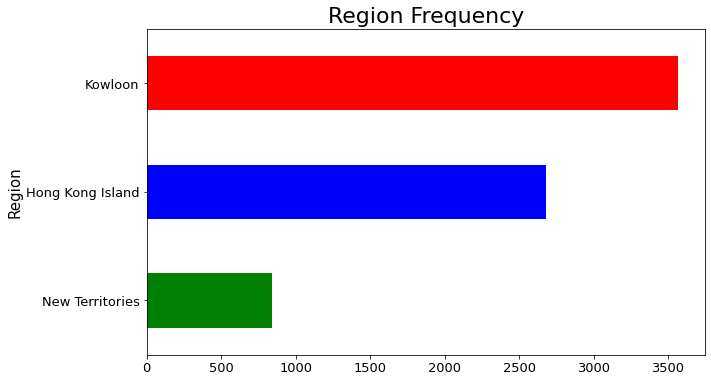

In [132]:
count_region = pd.value_counts(ab1['region'].values, ascending=True)
cd = count_region.plot(kind='barh', figsize=(10,6), color=['green', 'blue', 'red'], fontsize=13)
cd.set_alpha(0.8)
cd.set_title("Region Frequency", fontsize=22)
cd.set_ylabel("Region", fontsize=15)
plt.show()

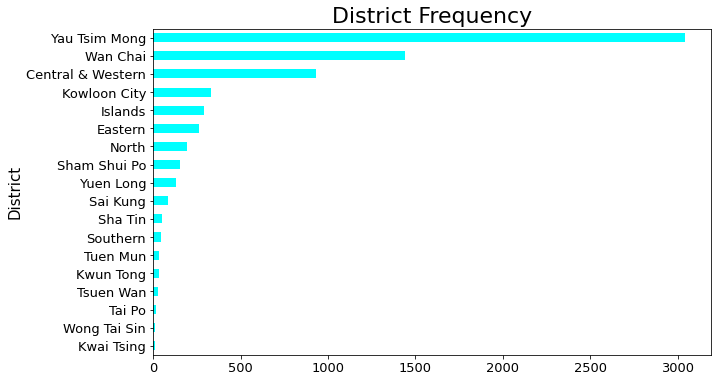

In [133]:
count_district = pd.value_counts(ab1['district'].values, ascending=True)
cd = count_district.plot(kind='barh', figsize=(10,6), color="cyan", fontsize=13);
cd.set_alpha(0.8)
cd.set_title("District Frequency", fontsize=22)
cd.set_ylabel("District", fontsize=15);
plt.show()
#It's not surprising that Yau Tsim Mong, Wan Chai & Central & Western are the top 3

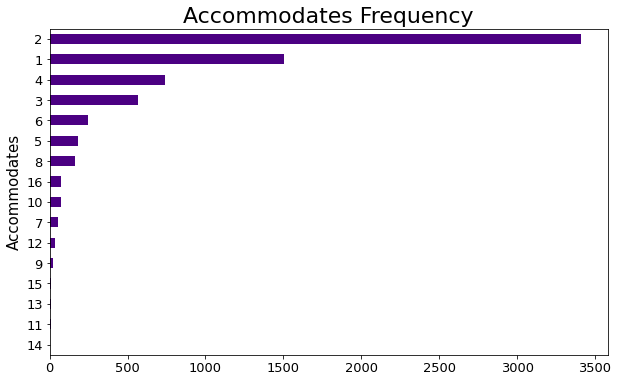

In [134]:
count_accommodates = pd.value_counts(ab1['accommodates'].values, ascending=True)
cd = count_accommodates.plot(kind='barh', figsize=(10,6), color="indigo", fontsize=13);
cd.set_alpha(0.8)
cd.set_title("Accommodates Frequency", fontsize=22)
cd.set_ylabel("Accommodates", fontsize=15);
plt.show()

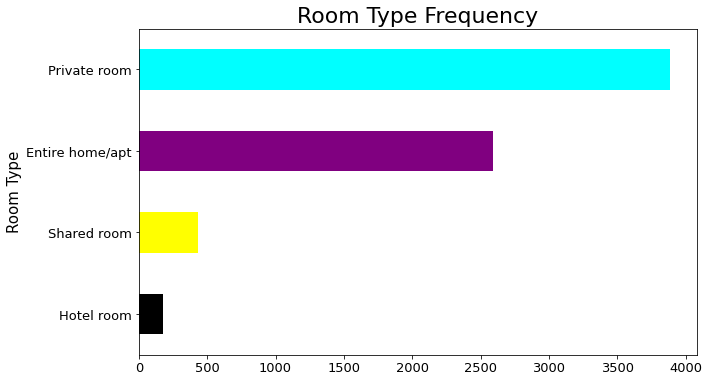

In [135]:
count_rmtype = pd.value_counts(ab1['room_type'].values, ascending=True)
cd = count_rmtype.plot(kind='barh', figsize=(10,6), color=['black', 'yellow', 'purple', 'cyan'], fontsize=13);
cd.set_alpha(0.8)
cd.set_title("Room Type Frequency", fontsize=22)
cd.set_ylabel("Room Type", fontsize=15);
plt.show()

# Let's graph each key attributes based on average prices

In [136]:
ab1.price.mean()
#Average price of all Hong Kong Airbnb

746.1698608398438

In [137]:
region_avgp = ab1.groupby(['region'])['price'].mean()
region_avgp

region
Hong Kong Island    707.552063
Kowloon             730.608154
New Territories     935.977356
Name: price, dtype: float32

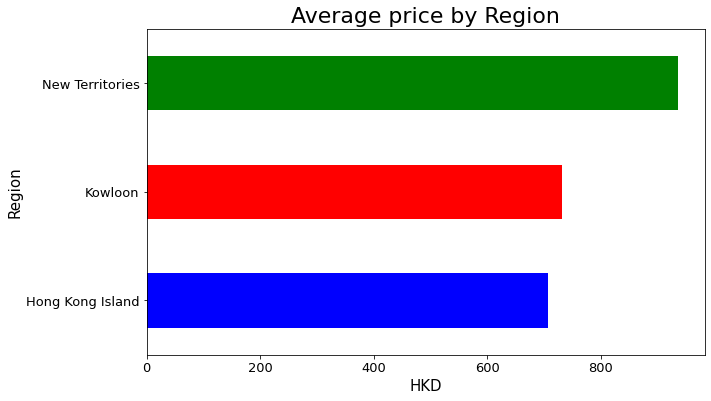

In [138]:
region_avgp_gp = region_avgp.plot(kind='barh', figsize=(10,6), color=['blue', 'red', 'green'], fontsize=13);
region_avgp_gp.set_alpha(0.8)
region_avgp_gp.set_title("Average price by Region", fontsize=22)
region_avgp_gp.set_xlabel("HKD", fontsize=15);
region_avgp_gp.set_ylabel("Region", fontsize=15);
plt.show()

In [147]:
district_avgp = ab1.groupby(['district'])['price'].mean()
district_avgp

district
Central & Western     817.509705
Eastern               597.781128
Islands              1025.162598
Kowloon City          834.756042
Kwai Tsing           1171.090942
Kwun Tong             681.625000
North                 770.461121
Sai Kung             1105.654785
Sha Tin               592.450989
Sham Shui Po          653.662354
Southern             1321.979126
Tai Po                717.647034
Tsuen Wan            1914.821411
Tuen Mun             1443.606079
Wan Chai              636.158569
Wong Tai Sin          492.916656
Yau Tsim Mong         724.581970
Yuen Long             681.454529
Name: price, dtype: float32

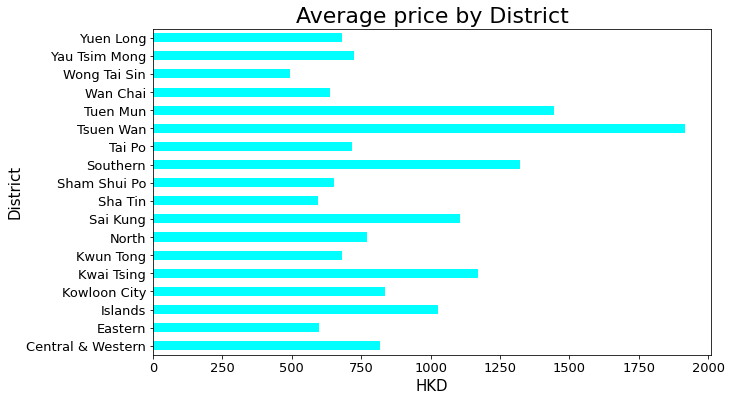

In [148]:
district_avgp_gp = district_avgp.plot(kind='barh',figsize=(10,6), color="cyan", fontsize=13);
district_avgp_gp.set_alpha(0.8)
district_avgp_gp.set_title("Average price by District", fontsize=22)
district_avgp_gp.set_xlabel("HKD", fontsize=15);
district_avgp_gp.set_ylabel("District", fontsize=15);
plt.show()

In [149]:
room_type_avgp = ab1.groupby(['room_type'])['price'].mean()
room_type_avgp

room_type
Entire home/apt    1016.570862
Hotel room          925.577759
Private room        570.039368
Shared room         635.551147
Name: price, dtype: float32

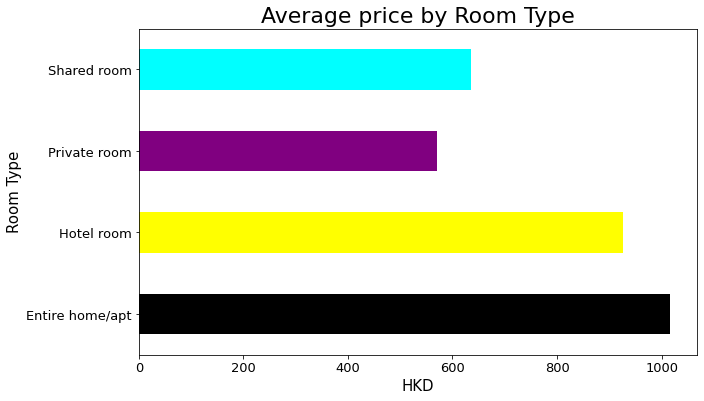

In [150]:
room_type_avgp_gp = room_type_avgp.plot(kind='barh', figsize=(10,6), color=['black', 'yellow', 'purple', 'cyan'], fontsize=13);
room_type_avgp_gp.set_alpha(0.8)
room_type_avgp_gp.set_title("Average price by Room Type", fontsize=22)
room_type_avgp_gp.set_xlabel("HKD", fontsize=15);
room_type_avgp_gp.set_ylabel("Room Type", fontsize=15);
plt.show()

In [152]:
avgsc = ab1.review_scores_rating.mean()
avgsc
#Average score of Hong Kong is great

89.7075172048703

In [153]:
region_avgsc = ab1.groupby(['region'])['review_scores_rating'].mean()
region_avgsc

region
Hong Kong Island    91.129543
Kowloon             88.261489
New Territories     92.771267
Name: review_scores_rating, dtype: float64

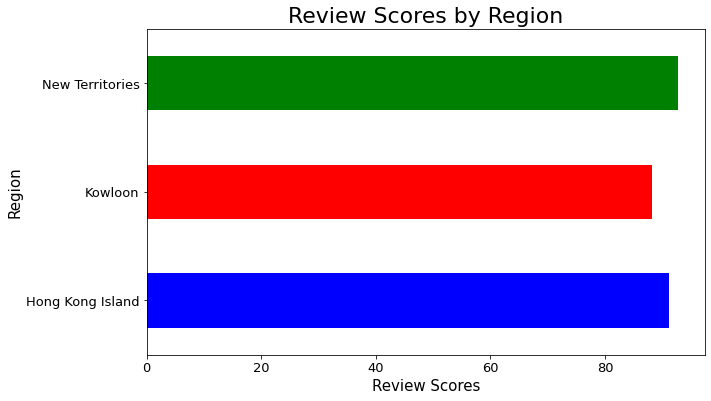

In [154]:
region_avgsc_gp = region_avgsc.plot(kind='barh', figsize=(10,6), color=['blue', 'red', 'green'], fontsize=13);
region_avgsc_gp.set_alpha(0.8)
region_avgsc_gp.set_title("Review Scores by Region", fontsize=22)
region_avgsc_gp.set_xlabel("Review Scores", fontsize=15);
region_avgsc_gp.set_ylabel("Region", fontsize=15);
plt.show()
#It seems so close~ Let's have a look by district

In [155]:
district_avgsc = ab1.groupby(['district'])['review_scores_rating'].mean()
district_avgsc
#Obviously, Yau Tsim Mong got a bad score

district
Central & Western    91.386161
Eastern              89.250000
Islands              91.271111
Kowloon City         88.041379
Kwai Tsing           96.200000
Kwun Tong            86.470588
North                92.161616
Sai Kung             96.078125
Sha Tin              96.277778
Sham Shui Po         85.772727
Southern             93.931034
Tai Po               92.692308
Tsuen Wan            87.545455
Tuen Mun             96.187500
Wan Chai             91.207627
Wong Tai Sin         96.000000
Yau Tsim Mong        88.350335
Yuen Long            93.550000
Name: review_scores_rating, dtype: float64

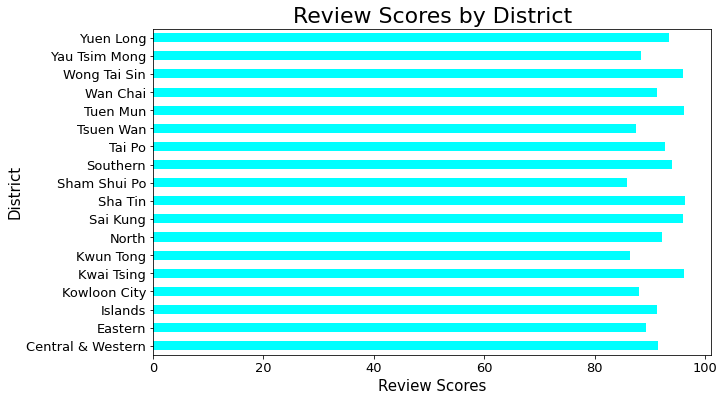

In [156]:
district_avgsc_gp = district_avgsc.plot(kind='barh', figsize=(10,6), color="cyan", fontsize=13)
district_avgsc_gp.set_alpha(0.8)
district_avgsc_gp.set_title("Review Scores by District", fontsize=22)
district_avgsc_gp.set_xlabel("Review Scores", fontsize=15)
district_avgsc_gp.set_ylabel("District", fontsize=15)
plt.show()

In [157]:
rm_type_avgsc = ab1.groupby(['room_type'])['review_scores_rating'].mean()
rm_type_avgsc

room_type
Entire home/apt    91.345912
Hotel room         88.071429
Private room       88.102341
Shared room        92.730964
Name: review_scores_rating, dtype: float64

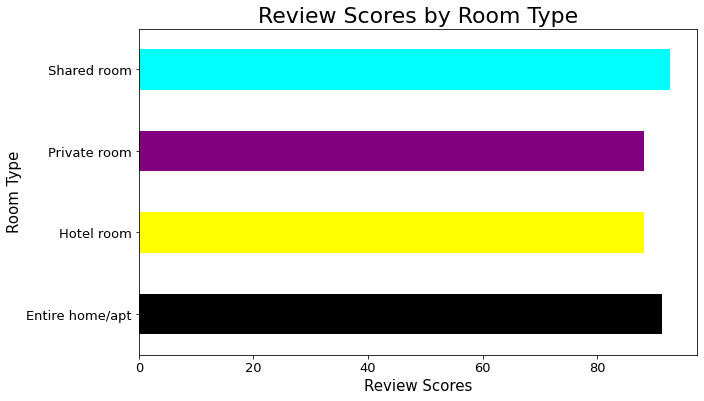

In [158]:
rm_type_avgsc_gp = rm_type_avgsc.plot(kind='barh', figsize=(10,6), color=['black', 'yellow', 'purple', 'cyan'], fontsize=13)
rm_type_avgsc_gp.set_alpha(0.8)
rm_type_avgsc_gp.set_title("Review Scores by Room Type", fontsize=22)
rm_type_avgsc_gp.set_xlabel("Review Scores", fontsize=15)
rm_type_avgsc_gp.set_ylabel("Room Type", fontsize=15)
plt.show()

<AxesSubplot:title={'center':'Reviews based on Price'}, xlabel='price'>

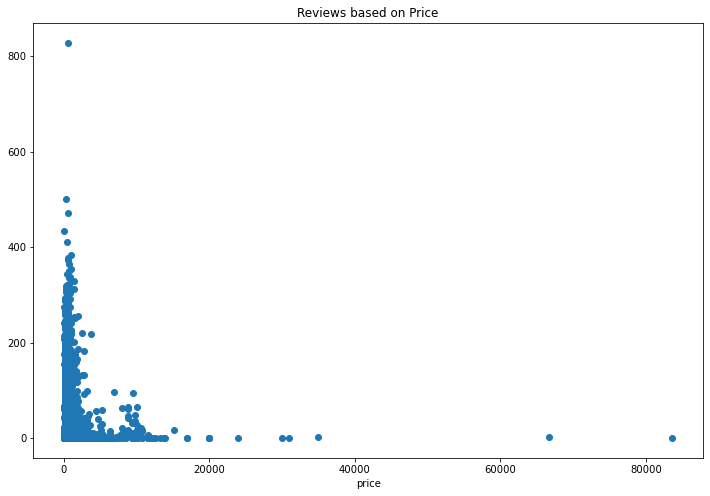

In [159]:
t1_price_review = ab1[['number_of_reviews', 'price']].sort_values(by = 'price')
t1_price_review.plot(x = 'price', y = 'number_of_reviews', style = 'o', figsize =(12,8),legend = False,title = 'Reviews based on Price')

In [160]:
t1corr_matrix = ab1.corr()
t1corr_matrix["price"].sort_values(ascending=False)
#Try to know the correlation of price with different attributes

price                   1.000000
accommodates            0.167264
bedrooms                0.147288
beds                    0.130786
review_scores_rating    0.032925
latitude               -0.003151
number_of_reviews      -0.017920
longitude              -0.030532
Name: price, dtype: float64

<AxesSubplot:>

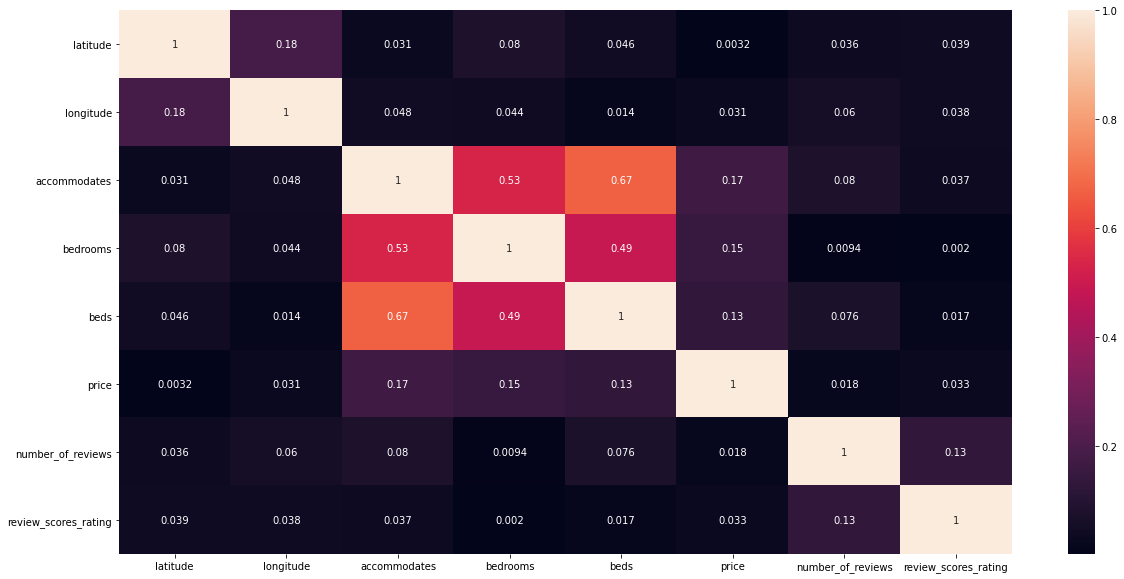

In [161]:
plt.figure(figsize=(20, 10))
sns.heatmap(ab1.corr().abs(), annot=True)
#Using Python Library, Seaborn to show all numerical attributes by heatmap

# Conclusion

The average price of all Hong Kong Airbnb is $746.16(HKD).

Most of the Airbnb is located at Kowloon(Yau Tsim Mong) and Hong Kong Island(Wan Chia, Central & Western).

However, the average price of New Territories($935.97) is higher than Kowloon($730.60) and Hong Kong Island($707.55).

The most expensive region is in Tsuen Wan($1914.82) and the cheapest region is Wong Tai Sin($492.91).

Prices are wildly based on district and room types.

In general, the average review scores of Hong Kong are great(89.7). The review scores of Kowloon are slightly lower than average.

Sha Tin, Kwai Tsing, and Tuen Mun get the top 3 highest average review scores, and Tsuen Wan, Kwun Tong, and Sham Shui Po get the 3 lowest average review scores.

Different attributes had a weak correlation with price. Not surprisingly, Beds and accommodates have a strong correlation (0.67).

If you are interested in data visualization by Tableau of this dataset, Please visit my tableau dashboard:
https://public.tableau.com/profile/pc830#!/vizhome/HongKongAirbnbDataVisualization/HongKongAirbnbDataVisualization